# Q1_2

importing libraries

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

define inputs and labels

In [ ]:
X1,y1 = make_classification(n_samples = 1000, n_features= 3, n_redundant=0, n_classes = 4,n_clusters_per_class=1,random_state=12, class_sep=2)

print('shape of X as input:',X1.shape)
print('shape of y as label:',y1.shape)

#plt.scatter(X[:,0],X[:,1],X[:,2],c=y)

shape of X as input: (1000, 3)
shape of y as label: (1000,)


plotting 3D of data

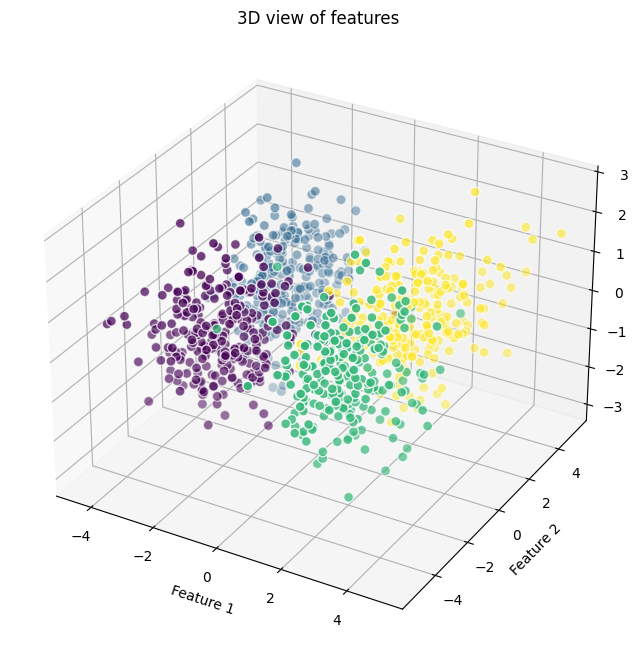

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=y1, s=50, edgecolors='w')  # Scatter plot of the original data points
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D view of features')
plt.savefig('3D_class_sep2.png')

plotting 2D of data
each axis is for one feature

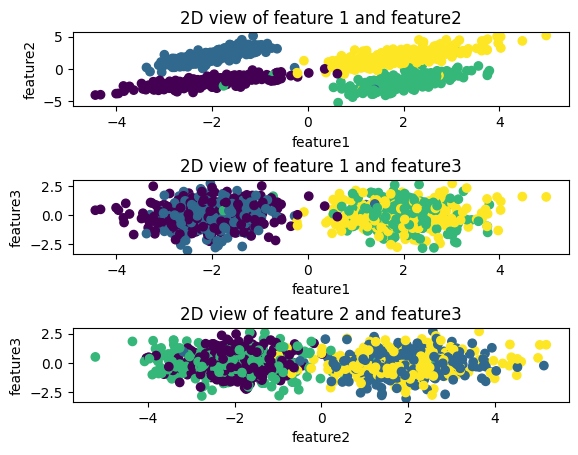

In [ ]:
plt.subplot(3,1,1)
plt.scatter(X1[:,0],X1[:,1],c=y1)
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('2D view of feature 1 and feature2')

plt.subplot(3,1,2)
plt.scatter(X1[:,0],X1[:,2],c=y1)
plt.xlabel('feature1')
plt.ylabel('feature3')
plt.title('2D view of feature 1 and feature3')

plt.subplot(3,1,3)
plt.scatter(X1[:,1],X1[:,2],c=y1)
plt.xlabel('feature2')
plt.ylabel('feature3')
plt.title('2D view of feature 2 and feature3')

plt.subplots_adjust(wspace=0.5, hspace = 1)
plt.savefig('2D_classes_sep2.png')

changing class_sep

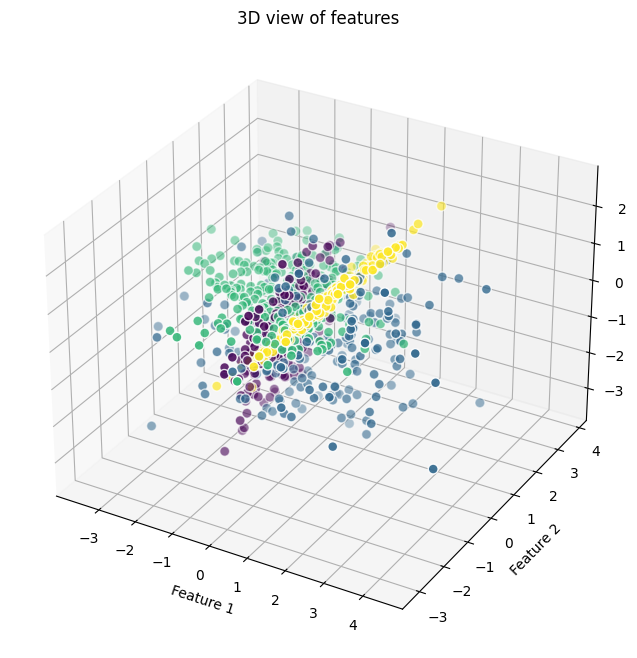

In [ ]:
X2,y2 = make_classification(n_samples = 1000, n_features= 3, n_redundant=0, n_classes = 4,n_clusters_per_class=1,random_state=44, class_sep=0.5)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c=y2, s=50, edgecolors='w')  # Scatter plot of the original data points
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D view of features')
plt.savefig('3D_class_sep0.5.png')

# Q1_3

importing libraries

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier,Perceptron


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X1,y1,test_size = 0.2)
print('shape of x_train as input:',x_train.shape)
print('shape of x_test as validation input:',x_test.shape)
print('shape of y_train as label:',y_train.shape)
print('shape of y_test as validation label:',y_test.shape)

shape of x_train as input: (800, 3)
shape of x_test as validation input: (200, 3)
shape of y_train as label: (800,)
shape of y_test as validation label: (200,)


Logistic Regression

In [ ]:
model1 = LogisticRegression(solver = 'newton-cg' )

different itteration

In [ ]:
train_accuracy = []
test_accuracy = []

for i in range(5):
  model1.max_iter = i
  model1.fit(x_train,y_train)
  train_accuracy.append(model1.score(x_train,y_train))
  test_accuracy.append(model1.score(x_test,y_test))

max_train_acc_index = np.argmax(train_accuracy)
max_train_acc_value = np.max(train_accuracy)
print('maximum accuracy for train data is',max_train_acc_value*100,'% for',max_train_acc_index,'index')
max_test_acc_index = np.argmax(test_accuracy)
max_test_acc_value = np.max(test_accuracy)
print('maximum accuracy for test data is',max_test_acc_value*100,'% for',max_test_acc_index,'index')

maximum accuracy for train data is 98.125 % for 4 index
maximum accuracy for test data is 97.5 % for 1 index


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


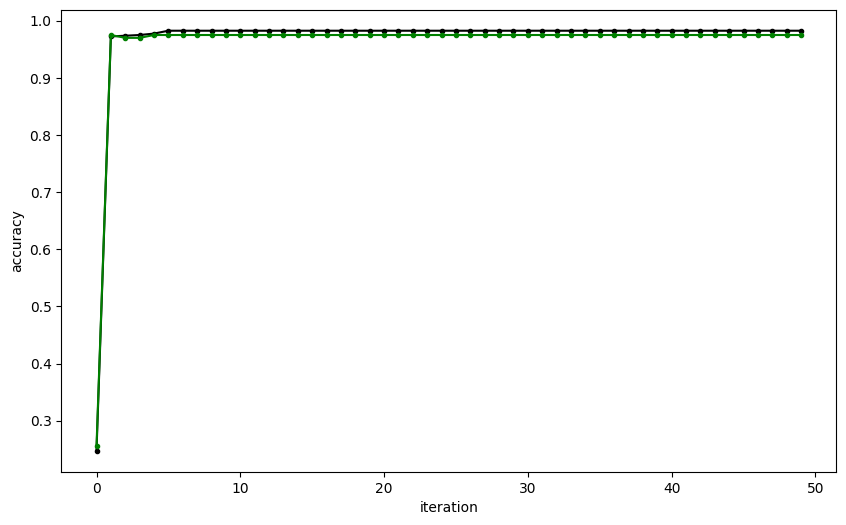

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, color = 'k', marker = '.')
plt.plot(test_accuracy, color = 'g', marker = '.')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.savefig('Logistic_different iteration.png')

different solvers

In [ ]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
model1.max_iter = 5
for solver in range(len(solvers)):
  model1.solver = solvers[solver]
  model1.fit(x_train,y_train)
  score_train = model1.score(x_train,y_train)
  score_test = model1.score(x_test,y_test)
  print('solver:',solvers[solver],'\n','score_train=',score_train*100,'\n','score_test=',score_test*100,'\n')


solver: lbfgs 
 score_train= 97.75 
 score_test= 97.5 

solver: liblinear 
 score_train= 97.5 
 score_test= 97.5 

solver: newton-cg 
 score_train= 98.25 
 score_test= 97.5 

solver: newton-cholesky 
 score_train= 97.625 
 score_test= 97.0 

solver: sag 
 score_train= 98.25 
 score_test= 97.5 

solver: saga 
 score_train= 98.0 
 score_test= 97.5 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:420: ConvergenceWarning: Newton solver did not converge after 5

SGD classifier

In [ ]:
model2 = SGDClassifier()

different itteration

In [ ]:
train_accuracy2 = []
test_accuracy2 = []

for i in range(10):
  model2.max_iter = i+1
  model2.fit(x_train,y_train)
  train_accuracy2.append(model2.score(x_train,y_train))
  test_accuracy2.append(model2.score(x_test,y_test))

max_train_acc_index2 = np.argmax(train_accuracy2)
max_train_acc_value2 = np.max(train_accuracy2)
print('maximum accuracy for train data is',max_train_acc_value2*100,'% for',max_train_acc_index2,'index')
max_test_acc_index2 = np.argmax(test_accuracy2)
max_test_acc_value2 = np.max(test_accuracy2)
print('maximum accuracy for test data is',max_test_acc_value2*100,'% for',max_test_acc_index2,'index')

maximum accuracy for train data is 97.875 % for 4 index
maximum accuracy for test data is 98.0 % for 4 index


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

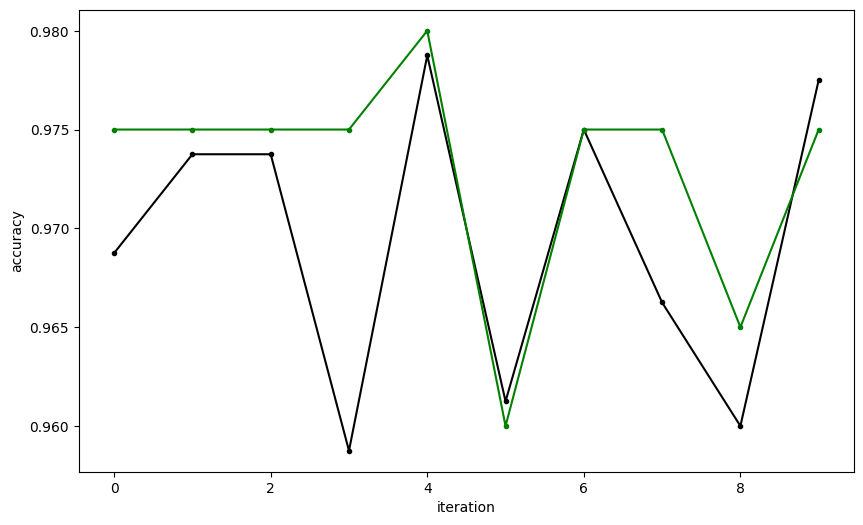

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy2, color = 'k', marker = '.')
plt.plot(test_accuracy2, color = 'g', marker = '.')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.savefig('SGD_differnt iteration.png')

different learning rate

In [ ]:
model2.learning_rate = 'constant'
learning_rates = np.linspace(0.05,0.5,100)
print(learning_rates)

train_accuracy3 = []
test_accuracy3 = []

for i in range(len(learning_rates)):
  model2.eta0 = learning_rates[i]
  model2.fit(x_train,y_train)
  train_accuracy3.append(model2.score(x_train,y_train))
  test_accuracy3.append(model2.score(x_test,y_test))
  print('eta0:',learning_rates[i],'\n','score_train=',train_accuracy3[i]*100,'\n','score_test=',test_accuracy3[i]*100,'\n')

[0.05       0.05454545 0.05909091 0.06363636 0.06818182 0.07272727
 0.07727273 0.08181818 0.08636364 0.09090909 0.09545455 0.1
 0.10454545 0.10909091 0.11363636 0.11818182 0.12272727 0.12727273
 0.13181818 0.13636364 0.14090909 0.14545455 0.15       0.15454545
 0.15909091 0.16363636 0.16818182 0.17272727 0.17727273 0.18181818
 0.18636364 0.19090909 0.19545455 0.2        0.20454545 0.20909091
 0.21363636 0.21818182 0.22272727 0.22727273 0.23181818 0.23636364
 0.24090909 0.24545455 0.25       0.25454545 0.25909091 0.26363636
 0.26818182 0.27272727 0.27727273 0.28181818 0.28636364 0.29090909
 0.29545455 0.3        0.30454545 0.30909091 0.31363636 0.31818182
 0.32272727 0.32727273 0.33181818 0.33636364 0.34090909 0.34545455
 0.35       0.35454545 0.35909091 0.36363636 0.36818182 0.37272727
 0.37727273 0.38181818 0.38636364 0.39090909 0.39545455 0.4
 0.40454545 0.40909091 0.41363636 0.41818182 0.42272727 0.42727273
 0.43181818 0.43636364 0.44090909 0.44545455 0.45       0.45454545
 0.459090

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

eta0: 0.15 
 score_train= 96.0 
 score_test= 96.0 

eta0: 0.15454545454545454 
 score_train= 97.375 
 score_test= 97.5 

eta0: 0.1590909090909091 
 score_train= 96.25 
 score_test= 98.0 

eta0: 0.16363636363636364 
 score_train= 96.125 
 score_test= 96.0 

eta0: 0.16818181818181818 
 score_train= 96.125 
 score_test= 96.5 

eta0: 0.17272727272727273 
 score_train= 96.875 
 score_test= 97.5 

eta0: 0.17727272727272725 
 score_train= 96.375 
 score_test= 98.0 

eta0: 0.18181818181818182 
 score_train= 96.125 
 score_test= 97.0 

eta0: 0.18636363636363634 
 score_train= 97.0 
 score_test= 97.5 

eta0: 0.19090909090909092 
 score_train= 95.75 
 score_test= 96.5 

eta0: 0.19545454545454544 
 score_train= 97.0 
 score_test= 97.5 

eta0: 0.2 
 score_train= 96.75 
 score_test= 97.5 

eta0: 0.20454545454545453 
 score_train= 96.75 
 score_test= 97.0 

eta0: 0.2090909090909091 
 score_train= 96.875 
 score_test= 98.0 

eta0: 0.21363636363636362 
 score_train= 96.875 
 score_test= 98.0 

eta0: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

eta0: 0.2545454545454545 
 score_train= 97.0 
 score_test= 97.5 

eta0: 0.2590909090909091 
 score_train= 97.375 
 score_test= 97.5 

eta0: 0.2636363636363636 
 score_train= 97.0 
 score_test= 98.0 

eta0: 0.2681818181818182 
 score_train= 91.5 
 score_test= 91.0 

eta0: 0.2727272727272727 
 score_train= 95.375 
 score_test= 96.0 

eta0: 0.2772727272727273 
 score_train= 97.25 
 score_test= 97.5 

eta0: 0.2818181818181818 
 score_train= 97.25 
 score_test= 97.5 

eta0: 0.2863636363636364 
 score_train= 96.75 
 score_test= 97.5 

eta0: 0.2909090909090909 
 score_train= 95.875 
 score_test= 97.5 

eta0: 0.29545454545454547 
 score_train= 96.5 
 score_test= 97.0 

eta0: 0.3 
 score_train= 95.875 
 score_test= 98.0 

eta0: 0.3045454545454545 
 score_train= 96.875 
 score_test= 96.5 

eta0: 0.3090909090909091 
 score_train= 95.5 
 score_test= 96.5 

eta0: 0.3136363636363636 
 score_train= 96.625 
 score_test= 96.0 

eta0: 0.3181818181818182 
 score_train= 97.25 
 score_test= 97.5 

eta0: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

eta0: 0.45454545454545453 
 score_train= 97.0 
 score_test= 97.5 

eta0: 0.45909090909090905 
 score_train= 97.5 
 score_test= 98.0 

eta0: 0.4636363636363636 
 score_train= 94.875 
 score_test= 95.0 

eta0: 0.46818181818181814 
 score_train= 94.125 
 score_test= 93.0 

eta0: 0.4727272727272727 
 score_train= 97.25 
 score_test= 97.5 

eta0: 0.47727272727272724 
 score_train= 95.875 
 score_test= 98.0 

eta0: 0.4818181818181818 
 score_train= 96.625 
 score_test= 97.0 

eta0: 0.48636363636363633 
 score_train= 97.0 
 score_test= 98.0 

eta0: 0.49090909090909085 
 score_train= 97.125 
 score_test= 97.5 

eta0: 0.4954545454545454 
 score_train= 97.5 
 score_test= 97.5 

eta0: 0.5 
 score_train= 97.25 
 score_test= 97.5 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

maximum accuracy for train data is 97.625 % for 0.39999999999999997 learning rate
maximum accuracy for test data is 98.0 % for 0.06818181818181818 learning rate


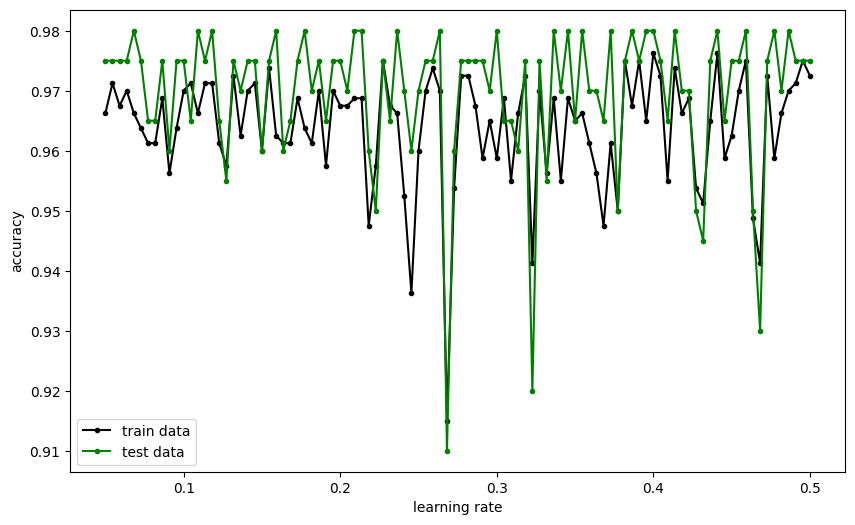

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(learning_rates,train_accuracy3, color = 'k', marker = '.')
plt.plot(learning_rates,test_accuracy3, color = 'g', marker = '.')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.savefig('accuracy differnt eta0.png')
plt.legend(['train data','test data'])
plt.savefig('SGD_differnt learning rate.png')

max_train_acc_index3 = np.argmax(train_accuracy3)
max_train_acc_value3 = np.max(train_accuracy3)
print('maximum accuracy for train data is',max_train_acc_value3*100,'% for',learning_rates[max_train_acc_index3],'learning rate')
max_test_acc_index3 = np.argmax(test_accuracy3)
max_test_acc_value3 = np.max(test_accuracy3)
print('maximum accuracy for test data is',max_test_acc_value3*100,'% for',learning_rates[max_test_acc_index3],'learning rate')

different alpha

In [ ]:
model2.learning_rate = 'optimal'

alphas = np.linspace(0.00001,1,100)

train_accuracy4 = []
test_accuracy4 = []

for i in range(len(alphas)):
  model2.alpha = alphas[i]
  model2.fit(x_train,y_train)
  train_accuracy4.append(model2.score(x_train,y_train))
  test_accuracy4.append(model2.score(x_test,y_test))
  print('alpha:',alphas[i],'\n','score_train=',train_accuracy4[i]*100,'\n','score_test=',test_accuracy4[i]*100,'\n')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

alpha: 1e-05 
 score_train= 97.625 
 score_test= 97.5 

alpha: 0.01011090909090909 
 score_train= 97.375 
 score_test= 97.5 

alpha: 0.02021181818181818 
 score_train= 97.0 
 score_test= 97.5 

alpha: 0.030312727272727272 
 score_train= 97.125 
 score_test= 97.5 

alpha: 0.04041363636363637 
 score_train= 97.125 
 score_test= 97.5 

alpha: 0.05051454545454546 
 score_train= 97.125 
 score_test= 97.5 

alpha: 0.06061545454545455 
 score_train= 97.25 
 score_test= 97.5 

alpha: 0.07071636363636363 
 score_train= 97.125 
 score_test= 97.5 

alpha: 0.08081727272727272 
 score_train= 97.0 
 score_test= 97.5 

alpha: 0.09091818181818181 
 score_train= 97.125 
 score_test= 97.5 

alpha: 0.1010190909090909 
 score_train= 96.875 
 score_test= 97.5 

alpha: 0.11112 
 score_train= 97.0 
 score_test= 97.5 

alpha: 0.12122090909090909 
 score_train= 96.875 
 score_test= 97.5 

alpha: 0.1313218181818182 
 score_train= 97.0 
 score_test= 97.5 

alpha: 0.14142272727272728 
 score_train= 97.0 
 score_t

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

alpha: 0.2525327272727273 
 score_train= 97.0 
 score_test= 97.5 

alpha: 0.2626336363636364 
 score_train= 96.875 
 score_test= 97.5 

alpha: 0.27273454545454545 
 score_train= 97.125 
 score_test= 97.5 

alpha: 0.28283545454545456 
 score_train= 96.875 
 score_test= 97.5 

alpha: 0.29293636363636366 
 score_train= 96.875 
 score_test= 97.5 

alpha: 0.3030372727272727 
 score_train= 97.0 
 score_test= 97.5 

alpha: 0.3131381818181818 
 score_train= 96.875 
 score_test= 97.5 

alpha: 0.3232390909090909 
 score_train= 97.0 
 score_test= 97.5 

alpha: 0.33334 
 score_train= 97.0 
 score_test= 97.5 

alpha: 0.34344090909090913 
 score_train= 96.875 
 score_test= 97.5 

alpha: 0.3535418181818182 
 score_train= 97.0 
 score_test= 97.5 

alpha: 0.3636427272727273 
 score_train= 97.0 
 score_test= 97.5 

alpha: 0.3737436363636364 
 score_train= 97.0 
 score_test= 97.5 

alpha: 0.38384454545454544 
 score_train= 97.125 
 score_test= 97.5 

alpha: 0.39394545454545454 
 score_train= 97.0 
 score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

alpha: 0.4848536363636364 
 score_train= 97.125 
 score_test= 97.5 

alpha: 0.4949545454545455 
 score_train= 97.0 
 score_test= 97.5 

alpha: 0.5050554545454545 
 score_train= 96.875 
 score_test= 97.5 

alpha: 0.5151563636363636 
 score_train= 97.0 
 score_test= 97.5 

alpha: 0.5252572727272727 
 score_train= 97.0 
 score_test= 97.5 

alpha: 0.5353581818181817 
 score_train= 97.0 
 score_test= 97.5 

alpha: 0.5454590909090908 
 score_train= 97.125 
 score_test= 97.5 

alpha: 0.5555599999999999 
 score_train= 97.125 
 score_test= 97.5 

alpha: 0.565660909090909 
 score_train= 97.0 
 score_test= 97.5 

alpha: 0.5757618181818182 
 score_train= 97.125 
 score_test= 97.5 

alpha: 0.5858627272727273 
 score_train= 97.0 
 score_test= 97.5 

alpha: 0.5959636363636364 
 score_train= 97.0 
 score_test= 97.5 

alpha: 0.6060645454545454 
 score_train= 97.0 
 score_test= 97.5 

alpha: 0.6161654545454545 
 score_train= 97.0 
 score_test= 97.5 

alpha: 0.6262663636363636 
 score_train= 97.125 
 sco

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

alpha: 0.7070736363636363 
 score_train= 97.125 
 score_test= 97.5 

alpha: 0.7171745454545454 
 score_train= 97.25 
 score_test= 97.5 

alpha: 0.7272754545454545 
 score_train= 97.125 
 score_test= 97.5 

alpha: 0.7373763636363636 
 score_train= 97.25 
 score_test= 97.5 

alpha: 0.7474772727272727 
 score_train= 97.125 
 score_test= 97.5 

alpha: 0.7575781818181818 
 score_train= 97.125 
 score_test= 97.5 

alpha: 0.7676790909090908 
 score_train= 97.125 
 score_test= 97.5 

alpha: 0.7777799999999999 
 score_train= 97.125 
 score_test= 97.5 

alpha: 0.787880909090909 
 score_train= 97.0 
 score_test= 98.0 

alpha: 0.7979818181818181 
 score_train= 97.125 
 score_test= 98.0 

alpha: 0.8080827272727272 
 score_train= 97.125 
 score_test= 98.0 

alpha: 0.8181836363636363 
 score_train= 96.875 
 score_test= 98.0 

alpha: 0.8282845454545454 
 score_train= 97.375 
 score_test= 97.5 

alpha: 0.8383854545454545 
 score_train= 96.75 
 score_test= 98.0 

alpha: 0.8484863636363636 
 score_train=

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

maximum accuracy for train data is 97.625 % for 1e-05 alpha quantity
maximum accuracy for test data is 98.0 % for 0.6767709090909091 alpha quantity


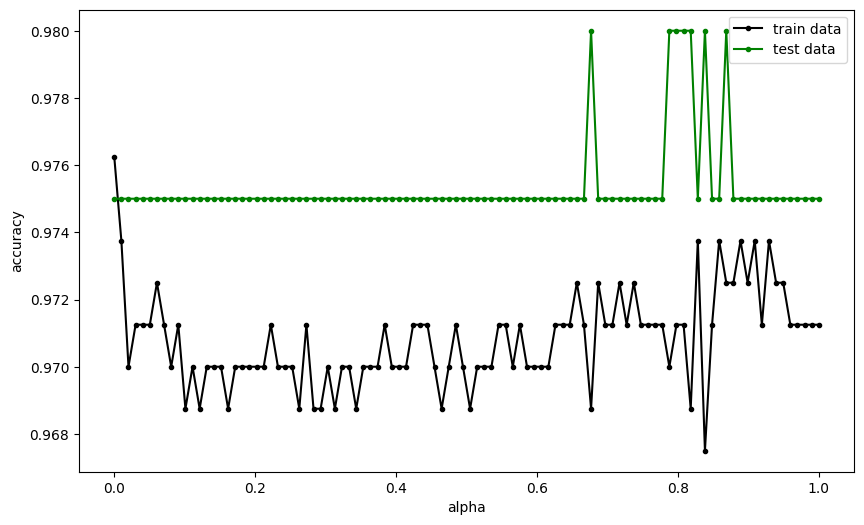

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(alphas,train_accuracy4, color = 'k', marker = '.')
plt.plot(alphas,test_accuracy4, color = 'g', marker = '.')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.savefig('accuracy differnt alpha.png')
plt.legend(['train data','test data'])
plt.savefig('SGD_differnt alpha.png')

max_train_acc_index4 = np.argmax(train_accuracy4)
max_train_acc_value4 = np.max(train_accuracy4)
print('maximum accuracy for train data is',max_train_acc_value4*100,'% for',alphas[max_train_acc_index4],'alpha quantity')
max_test_acc_index4 = np.argmax(test_accuracy4)
max_test_acc_value4 = np.max(test_accuracy4)
print('maximum accuracy for test data is',max_test_acc_value4*100,'% for',alphas[max_test_acc_index4],'alpha quantity')

Perceptron classifier

In [ ]:
model3 = Perceptron()

different itteration

In [ ]:
train_accuracy5 = []
test_accuracy5 = []

for i in range(10):
  model3.max_iter = i+1
  model3.fit(x_train,y_train)
  train_accuracy5.append(model3.score(x_train,y_train))
  test_accuracy5.append(model3.score(x_test,y_test))

max_train_acc_index5 = np.argmax(train_accuracy5)
max_train_acc_value5 = np.max(train_accuracy5)
print('maximum accuracy for train data is',max_train_acc_value5*100,'% for',max_train_acc_index5,'index')
max_test_acc_index5 = np.argmax(test_accuracy5)
max_test_acc_value5 = np.max(test_accuracy5)
print('maximum accuracy for test data is',max_test_acc_value5*100,'% for',max_test_acc_index5,'index')

maximum accuracy for train data is 97.75 % for 4 index
maximum accuracy for test data is 98.0 % for 5 index


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

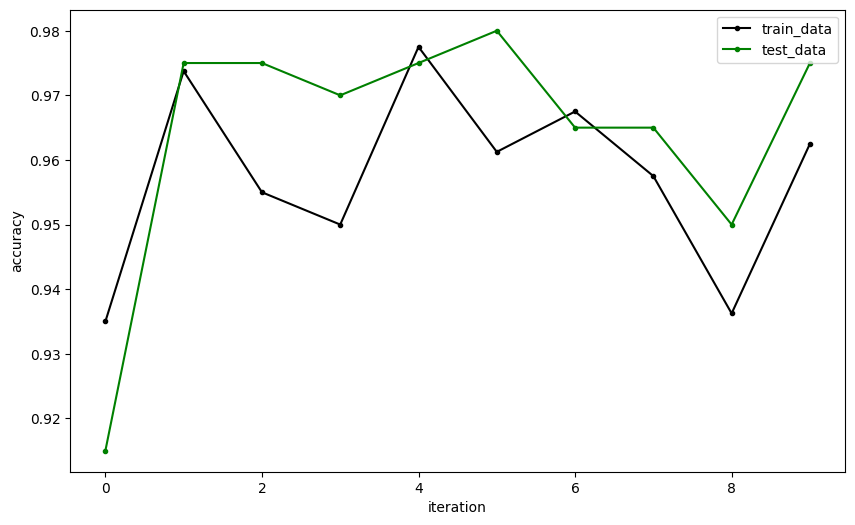

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy5, color = 'k', marker = '.')
plt.plot(test_accuracy5, color = 'g', marker = '.')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.legend(['train_data','test_data'])
plt.savefig('Perceptron_differnt iteration.png')

different learning rate

In [ ]:
model3.learning_rate = 'constant'
learning_rates = np.linspace(0.05,0.5,100)
print(learning_rates)

train_accuracy6 = []
test_accuracy6 = []

for i in range(len(learning_rates)):
  model3.eta0 = learning_rates[i]
  model3.fit(x_train,y_train)
  train_accuracy6.append(model3.score(x_train,y_train))
  test_accuracy6.append(model3.score(x_test,y_test))
  print('eta0:',learning_rates[i],'\n','score_train=',train_accuracy6[i]*100,'\n','score_test=',test_accuracy6[i]*100,'\n')

[0.05       0.05454545 0.05909091 0.06363636 0.06818182 0.07272727
 0.07727273 0.08181818 0.08636364 0.09090909 0.09545455 0.1
 0.10454545 0.10909091 0.11363636 0.11818182 0.12272727 0.12727273
 0.13181818 0.13636364 0.14090909 0.14545455 0.15       0.15454545
 0.15909091 0.16363636 0.16818182 0.17272727 0.17727273 0.18181818
 0.18636364 0.19090909 0.19545455 0.2        0.20454545 0.20909091
 0.21363636 0.21818182 0.22272727 0.22727273 0.23181818 0.23636364
 0.24090909 0.24545455 0.25       0.25454545 0.25909091 0.26363636
 0.26818182 0.27272727 0.27727273 0.28181818 0.28636364 0.29090909
 0.29545455 0.3        0.30454545 0.30909091 0.31363636 0.31818182
 0.32272727 0.32727273 0.33181818 0.33636364 0.34090909 0.34545455
 0.35       0.35454545 0.35909091 0.36363636 0.36818182 0.37272727
 0.37727273 0.38181818 0.38636364 0.39090909 0.39545455 0.4
 0.40454545 0.40909091 0.41363636 0.41818182 0.42272727 0.42727273
 0.43181818 0.43636364 0.44090909 0.44545455 0.45       0.45454545
 0.459090

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

eta0: 0.13636363636363635 
 score_train= 93.125 
 score_test= 94.5 

eta0: 0.14090909090909093 
 score_train= 93.125 
 score_test= 94.5 

eta0: 0.14545454545454545 
 score_train= 93.125 
 score_test= 94.5 

eta0: 0.15 
 score_train= 93.125 
 score_test= 94.5 

eta0: 0.15454545454545454 
 score_train= 93.125 
 score_test= 94.5 

eta0: 0.1590909090909091 
 score_train= 93.125 
 score_test= 94.5 

eta0: 0.16363636363636364 
 score_train= 93.125 
 score_test= 94.5 

eta0: 0.16818181818181818 
 score_train= 93.125 
 score_test= 94.5 

eta0: 0.17272727272727273 
 score_train= 93.125 
 score_test= 94.5 

eta0: 0.17727272727272725 
 score_train= 93.125 
 score_test= 94.5 

eta0: 0.18181818181818182 
 score_train= 93.125 
 score_test= 94.5 

eta0: 0.18636363636363634 
 score_train= 93.125 
 score_test= 94.5 

eta0: 0.19090909090909092 
 score_train= 93.125 
 score_test= 94.5 

eta0: 0.19545454545454544 
 score_train= 93.125 
 score_test= 94.5 

eta0: 0.2 
 score_train= 93.125 
 score_test= 94.5

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

eta0: 0.32727272727272727 
 score_train= 96.25 
 score_test= 97.5 

eta0: 0.3318181818181818 
 score_train= 96.25 
 score_test= 97.5 

eta0: 0.33636363636363636 
 score_train= 96.25 
 score_test= 97.5 

eta0: 0.3409090909090909 
 score_train= 96.25 
 score_test= 97.5 

eta0: 0.3454545454545454 
 score_train= 96.25 
 score_test= 97.5 

eta0: 0.35 
 score_train= 96.25 
 score_test= 97.5 

eta0: 0.3545454545454545 
 score_train= 96.25 
 score_test= 97.5 

eta0: 0.35909090909090907 
 score_train= 96.25 
 score_test= 97.5 

eta0: 0.3636363636363636 
 score_train= 96.25 
 score_test= 97.5 

eta0: 0.36818181818181817 
 score_train= 96.25 
 score_test= 97.5 

eta0: 0.3727272727272727 
 score_train= 96.25 
 score_test= 97.5 

eta0: 0.37727272727272726 
 score_train= 96.25 
 score_test= 97.5 

eta0: 0.3818181818181818 
 score_train= 96.25 
 score_test= 97.5 

eta0: 0.38636363636363635 
 score_train= 96.25 
 score_test= 97.5 

eta0: 0.3909090909090909 
 score_train= 96.25 
 score_test= 97.5 

eta

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

maximum accuracy for train data is 96.25 % for 0.2318181818181818 learning rate
maximum accuracy for test data is 97.5 % for 0.05 learning rate


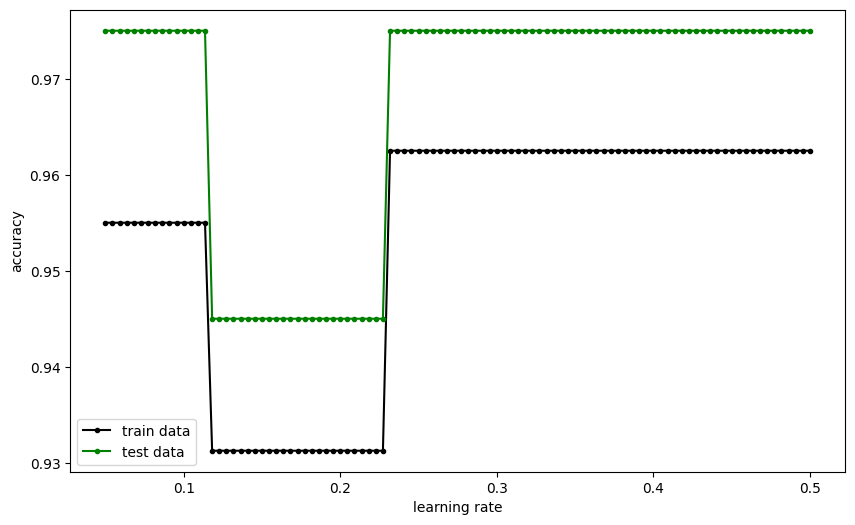

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(learning_rates,train_accuracy6, color = 'k', marker = '.')
plt.plot(learning_rates,test_accuracy6, color = 'g', marker = '.')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.legend(['train data','test data'])
plt.savefig('Perceptron_different eta0.png')

max_train_acc_index6 = np.argmax(train_accuracy6)
max_train_acc_value6 = np.max(train_accuracy6)
print('maximum accuracy for train data is',max_train_acc_value6*100,'% for',learning_rates[max_train_acc_index6],'learning rate')
max_test_acc_index6 = np.argmax(test_accuracy6)
max_test_acc_value6 = np.max(test_accuracy6)
print('maximum accuracy for test data is',max_test_acc_value6*100,'% for',learning_rates[max_test_acc_index6],'learning rate')

different alpha

In [ ]:
model3.learning_rate = 'optimal'

alphas = np.linspace(0.00001,1,100)

train_accuracy7 = []
test_accuracy7 = []

for i in range(len(alphas)):
  model3.alpha = alphas[i]
  model3.fit(x_train,y_train)
  train_accuracy7.append(model3.score(x_train,y_train))
  test_accuracy7.append(model3.score(x_test,y_test))
  print('alpha:',alphas[i],'\n','score_train=',train_accuracy7[i]*100,'\n','score_test=',test_accuracy7[i]*100,'\n')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

alpha: 1e-05 
 score_train= 95.125 
 score_test= 94.5 

alpha: 0.01011090909090909 
 score_train= 97.875 
 score_test= 98.0 

alpha: 0.02021181818181818 
 score_train= 97.875 
 score_test= 98.0 

alpha: 0.030312727272727272 
 score_train= 98.125 
 score_test= 98.0 

alpha: 0.04041363636363637 
 score_train= 97.75 
 score_test= 98.0 

alpha: 0.05051454545454546 
 score_train= 98.125 
 score_test= 98.0 

alpha: 0.06061545454545455 
 score_train= 98.125 
 score_test= 98.0 

alpha: 0.07071636363636363 
 score_train= 97.875 
 score_test= 98.0 

alpha: 0.08081727272727272 
 score_train= 98.0 
 score_test= 98.0 

alpha: 0.09091818181818181 
 score_train= 98.125 
 score_test= 98.0 

alpha: 0.1010190909090909 
 score_train= 98.0 
 score_test= 98.0 

alpha: 0.11112 
 score_train= 98.125 
 score_test= 98.0 

alpha: 0.12122090909090909 
 score_train= 98.125 
 score_test= 98.0 

alpha: 0.1313218181818182 
 score_train= 98.125 
 score_test= 98.0 

alpha: 0.14142272727272728 
 score_train= 97.75 
 sc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

alpha: 0.2323309090909091 
 score_train= 97.375 
 score_test= 97.5 

alpha: 0.2424318181818182 
 score_train= 97.375 
 score_test= 97.5 

alpha: 0.2525327272727273 
 score_train= 97.25 
 score_test= 97.5 

alpha: 0.2626336363636364 
 score_train= 97.5 
 score_test= 97.5 

alpha: 0.27273454545454545 
 score_train= 97.375 
 score_test= 98.0 

alpha: 0.28283545454545456 
 score_train= 97.25 
 score_test= 98.0 

alpha: 0.29293636363636366 
 score_train= 97.125 
 score_test= 98.0 

alpha: 0.3030372727272727 
 score_train= 97.25 
 score_test= 98.0 

alpha: 0.3131381818181818 
 score_train= 97.25 
 score_test= 98.0 

alpha: 0.3232390909090909 
 score_train= 97.125 
 score_test= 98.0 

alpha: 0.33334 
 score_train= 97.0 
 score_test= 98.0 

alpha: 0.34344090909090913 
 score_train= 97.125 
 score_test= 98.0 

alpha: 0.3535418181818182 
 score_train= 97.0 
 score_test= 98.0 

alpha: 0.3636427272727273 
 score_train= 97.0 
 score_test= 98.0 

alpha: 0.3737436363636364 
 score_train= 96.75 
 scor

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

alpha: 0.4545509090909091 
 score_train= 96.5 
 score_test= 98.0 

alpha: 0.46465181818181817 
 score_train= 96.5 
 score_test= 98.0 

alpha: 0.47475272727272727 
 score_train= 96.375 
 score_test= 98.0 

alpha: 0.4848536363636364 
 score_train= 96.25 
 score_test= 98.0 

alpha: 0.4949545454545455 
 score_train= 96.125 
 score_test= 98.0 

alpha: 0.5050554545454545 
 score_train= 96.125 
 score_test= 98.0 

alpha: 0.5151563636363636 
 score_train= 96.0 
 score_test= 98.0 

alpha: 0.5252572727272727 
 score_train= 96.125 
 score_test= 98.0 

alpha: 0.5353581818181817 
 score_train= 96.125 
 score_test= 98.0 

alpha: 0.5454590909090908 
 score_train= 96.125 
 score_test= 98.0 

alpha: 0.5555599999999999 
 score_train= 96.0 
 score_test= 98.0 

alpha: 0.565660909090909 
 score_train= 96.0 
 score_test= 98.0 

alpha: 0.5757618181818182 
 score_train= 95.875 
 score_test= 98.0 

alpha: 0.5858627272727273 
 score_train= 95.875 
 score_test= 98.0 

alpha: 0.5959636363636364 
 score_train= 95.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

alpha: 0.6262663636363636 
 score_train= 95.875 
 score_test= 98.0 

alpha: 0.6363672727272727 
 score_train= 95.875 
 score_test= 98.0 

alpha: 0.6464681818181818 
 score_train= 95.875 
 score_test= 98.0 

alpha: 0.6565690909090909 
 score_train= 95.875 
 score_test= 98.0 

alpha: 0.66667 
 score_train= 95.875 
 score_test= 98.0 

alpha: 0.6767709090909091 
 score_train= 95.875 
 score_test= 98.0 

alpha: 0.6868718181818182 
 score_train= 95.875 
 score_test= 98.0 

alpha: 0.6969727272727272 
 score_train= 95.75 
 score_test= 98.0 

alpha: 0.7070736363636363 
 score_train= 95.875 
 score_test= 98.0 

alpha: 0.7171745454545454 
 score_train= 96.0 
 score_test= 98.0 

alpha: 0.7272754545454545 
 score_train= 96.125 
 score_test= 98.0 

alpha: 0.7373763636363636 
 score_train= 96.0 
 score_test= 98.0 

alpha: 0.7474772727272727 
 score_train= 96.0 
 score_test= 98.0 

alpha: 0.7575781818181818 
 score_train= 96.0 
 score_test= 98.0 

alpha: 0.7676790909090908 
 score_train= 95.875 
 scor

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

maximum accuracy for train data is 98.125 % for 0.030312727272727272 alpha quantity
maximum accuracy for test data is 98.0 % for 0.01011090909090909 alpha quantity


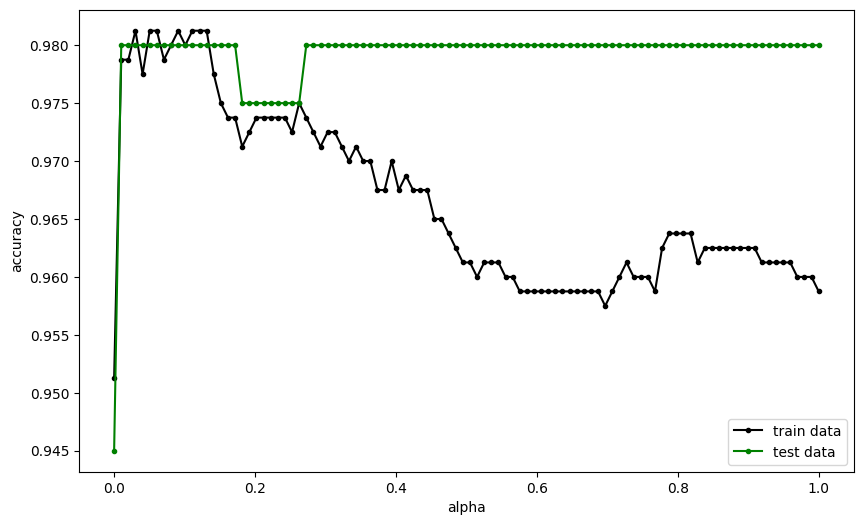

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(alphas,train_accuracy7, color = 'k', marker = '.')
plt.plot(alphas,test_accuracy7, color = 'g', marker = '.')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.savefig('Perceptron_different alpha.png')
plt.legend(['train data','test data'])

max_train_acc_index7 = np.argmax(train_accuracy7)
max_train_acc_value7 = np.max(train_accuracy7)
print('maximum accuracy for train data is',max_train_acc_value7*100,'% for',alphas[max_train_acc_index7],'alpha quantity')
max_test_acc_index7 = np.argmax(test_accuracy7)
max_test_acc_value7 = np.max(test_accuracy7)
print('maximum accuracy for test data is',max_test_acc_value7*100,'% for',alphas[max_test_acc_index7],'alpha quantity')

#Q1_4

importing libraries

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,SGDClassifier,Perceptron

In [ ]:
def plot_region(x,y,model,name='Train data'):

    def miss_class():

        hat = model.predict(x)
        miss = np.where(y != hat)
        miss = x[miss]
        return miss

    scatter_highlight_kwargs = {'s': 60, 'label': 'Missclassified', 'alpha': 0.7, 'linewidth':2}
    ax = plot_decision_regions(x,y,clf=model,zoom_factor = 1.,legend = 0,X_highlight = miss_class(),scatter_highlight_kwargs =  scatter_highlight_kwargs)
    ax.legend(loc='upper right')
    ax.set_title(f'Decision region for {name}')
    ax.set_xlabel('Latent feature 1')
    ax.set_ylabel('Latent feature 2')

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE

t-SNE is a tool to visualize high-dimensional data.

In [ ]:
t = TSNE(n_components = 2,random_state = 44)

In [ ]:
X_embedded = t.fit_transform(X1,y1)

In [ ]:
x_tr, x_te, y_tr, y_te = train_test_split( X_embedded, y1, test_size = 0.2)

# scaling
scaler = StandardScaler().fit(x_tr)
x_train_r_s  = scaler.transform(x_tr)
x_val_r_s  = scaler.transform(x_te)

In [ ]:
model_1= LogisticRegression(solver = 'sag',max_iter = 5,random_state = 44)

model_2 = SGDClassifier(max_iter =5,learning_rate = 'constant',eta0 = 0.3227272727272727,alpha = 0.02021181818181818,random_state = 44)

model_3 = Perceptron(max_iter = 5,eta0 =  0.07727272727272727,alpha = 0.02021181818181818,random_state = 44)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/

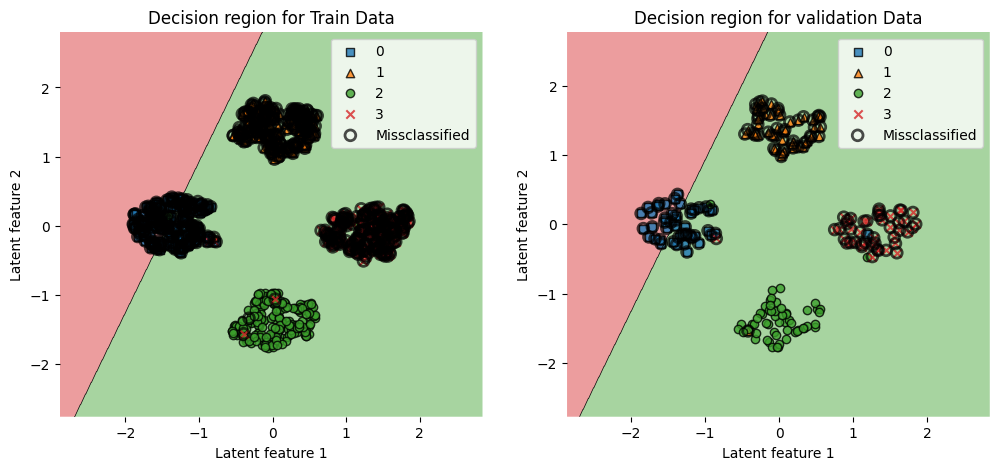

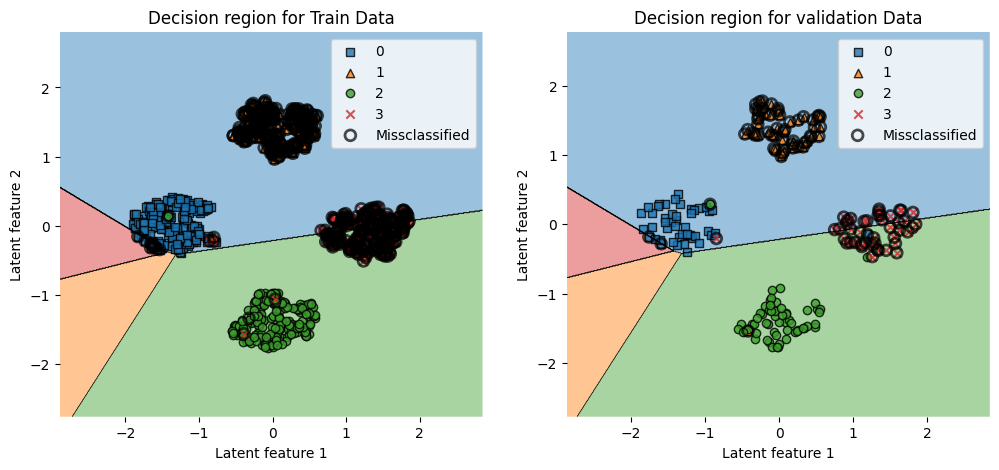

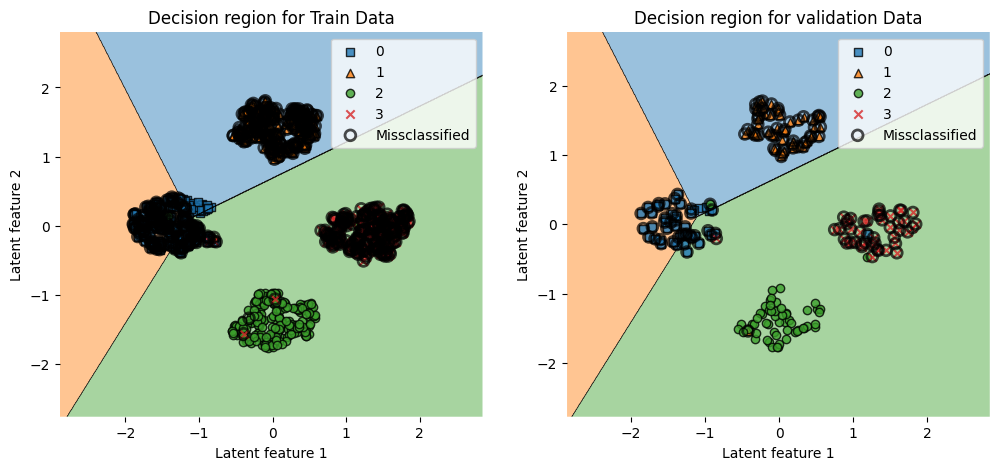

In [ ]:
models = [model_1,model_2,model_3]
model_names = ['model_1', 'model_2', 'model_3']
for i, m in enumerate(models):
    m.fit(x_train_r_s,y_train)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plot_region(x_train_r_s,y_tr,m,'Train Data')
    plt.subplot(1,2,2)
    plot_region(x_val_r_s,y_te,m,'validation Data')
    image_name = model_names[i]+'.png'
    plt.savefig(image_name)

#Q1_5

In [ ]:
!pip install drawdata
from drawdata import ScatterWidget

widget = ScatterWidget()
widget


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.8/246.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.6/730.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.3/383.3 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

ScatterWidget()

In [ ]:
widget.data


[{'x': 105.28123360422002,
  'y': 293.0259055126904,
  'color': '#1f77b4',
  'label': 'a'},
 {'x': 101.84770683648675,
  'y': 295.0854885784184,
  'color': '#1f77b4',
  'label': 'a'},
 {'x': 115.13855040806291,
  'y': 296.2036828368152,
  'color': '#1f77b4',
  'label': 'a'},
 {'x': 128.51157407292322,
  'y': 302.5320796309794,
  'color': '#1f77b4',
  'label': 'a'},
 {'x': 130.2163423384591,
  'y': 339.8338159710807,
  'color': '#1f77b4',
  'label': 'a'},
 {'x': 152.23195063651644,
  'y': 335.44239157422214,
  'color': '#1f77b4',
  'label': 'a'},
 {'x': 147.91486284876797,
  'y': 379.0606733689413,
  'color': '#1f77b4',
  'label': 'a'},
 {'x': 182.60335509337258,
  'y': 387.66032097629073,
  'color': '#1f77b4',
  'label': 'a'},
 {'x': 170.42286428679,
  'y': 377.3991329860368,
  'color': '#1f77b4',
  'label': 'a'},
 {'x': 187.11523901490983,
  'y': 404.9174706227229,
  'color': '#1f77b4',
  'label': 'a'},
 {'x': 182.27120981982387,
  'y': 379.31759239433825,
  'color': '#1f77b4',
  'lab

In [ ]:
import pandas as pd
w = widget.data_as_pandas

In [ ]:
#https://drive.google.com/file/d/1qGQVoBFBQnDqTvojv0mwZ8rLSG8_Jrde/view?usp=sharing
!gdown 1qGQVoBFBQnDqTvojv0mwZ8rLSG8_Jrde

Downloading...
From: https://drive.google.com/uc?id=1qGQVoBFBQnDqTvojv0mwZ8rLSG8_Jrde
To: /content/drawed_data1.csv
100% 5.00/5.00 [00:00<00:00, 20.4kB/s]


In [ ]:
w.to_csv('/content/drawed_data1.csv')

In [ ]:
df = pd.read_csv('/content/drawed_data1.csv')

In [ ]:
X1 = df[['x','y']].values
y1 = df[['label']].values
#print(X.shape)
#print(y.shape)
for i in range(len(y1)):
  if y1[i] == 'a':
    y1[i]=0
  elif y1[i] =='b':
    y1[i]=1
  elif y1[i] =='c':
    y1[i]=2
  elif y1[i] =='d':
    y1[i]=3
y_new = y1
yn = np.concatenate(y_new).astype(None)
yn

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1.

In [ ]:
from sklearn.model_selection import train_test_split

x1_train,x1_test,y1_train,y1_test = train_test_split(X1,yn,test_size= 0.2)
print('shape of x_train as input:',x1_train.shape)
print('shape of x_test as validation input:',x1_test.shape)
print('shape of y_train as label:',y1_train.shape)
print('shape of y_test as validation label:',y1_test.shape)

shape of x_train as input: (704, 2)
shape of x_test as validation input: (176, 2)
shape of y_train as label: (704,)
shape of y_test as validation label: (176,)


In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier

In [ ]:
model_1 = LogisticRegression(solver = 'newton-cg' )

In [ ]:
train_accuracy_1 = []
test_accuracy_1 = []

for i in range(5):
  model_1.max_iter = i
  model_1.fit(x1_train,y1_train)
  train_accuracy_1.append(model_1.score(x1_train,y1_train))
  test_accuracy_1.append(model_1.score(x1_test,y1_test))

max_train_acc_index_1 = np.argmax(train_accuracy_1)
max_train_acc_value_1 = np.max(train_accuracy_1)
print('maximum accuracy for train data is',max_train_acc_value_1*100,'% for',max_train_acc_index_1,'index')
max_test_acc_index_1 = np.argmax(test_accuracy_1)
max_test_acc_value_1 = np.max(test_accuracy_1)
print('maximum accuracy for test data is',max_test_acc_value_1*100,'% for',max_test_acc_index_1,'index')

maximum accuracy for train data is 72.44318181818183 % for 4 index
maximum accuracy for test data is 73.86363636363636 % for 4 index


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


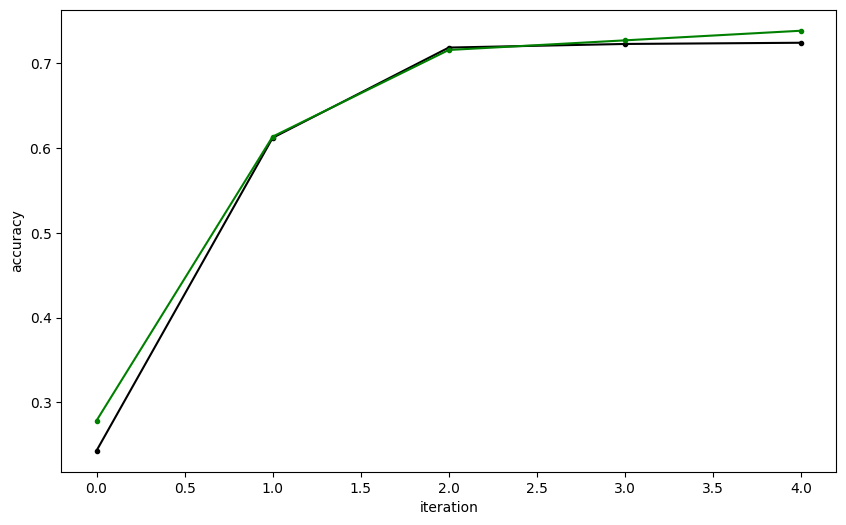

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy_1, color = 'k', marker = '.')
plt.plot(test_accuracy_1, color = 'g', marker = '.')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.savefig('dLogistic_different iteration.png')

In [ ]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
model_1.max_iter = 5
for solver in range(len(solvers)):
  model_1.solver = solvers[solver]
  model_1.fit(x1_train,y1_train)
  score_train_1 = model_1.score(x1_train,y1_train)
  score_test_1 = model_1.score(x1_test,y1_test)
  print('solver:',solvers[solver],'\n','score_train=',score_train_1*100,'\n','score_test=',score_test_1*100,'\n')


solver: lbfgs 
 score_train= 71.73295454545455 
 score_test= 71.5909090909091 

solver: liblinear 
 score_train= 72.44318181818183 
 score_test= 72.72727272727273 

solver: newton-cg 
 score_train= 72.44318181818183 
 score_test= 73.86363636363636 

solver: newton-cholesky 
 score_train= 98.01136363636364 
 score_test= 98.29545454545455 

solver: sag 
 score_train= 71.02272727272727 
 score_test= 71.02272727272727 

solver: saga 
 score_train= 72.44318181818183 
 score_test= 72.72727272727273 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:420: ConvergenceWarning: Newton solver did not converge after 5

SGD classifier

In [ ]:
model_2 = SGDClassifier()

In [ ]:
train_accuracy_2 = []
test_accuracy_2 = []

for i in range(5):
  model_2.max_iter = i+1
  model_2.fit(x1_train,y1_train)
  train_accuracy_2.append(model_2.score(x1_train,y1_train))
  test_accuracy_2.append(model_2.score(x1_test,y1_test))

max_train_acc_index_2 = np.argmax(train_accuracy_2)
max_train_acc_value_2 = np.max(train_accuracy_2)
print('maximum accuracy for train data is',max_train_acc_value_2*100,'% for',max_train_acc_index_2,'index')
max_test_acc_index_2 = np.argmax(test_accuracy_2)
max_test_acc_value_2 = np.max(test_accuracy_2)
print('maximum accuracy for test data is',max_test_acc_value_2*100,'% for',max_test_acc_index_2,'index')

maximum accuracy for train data is 72.44318181818183 % for 3 index
maximum accuracy for test data is 73.29545454545455 % for 3 index


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

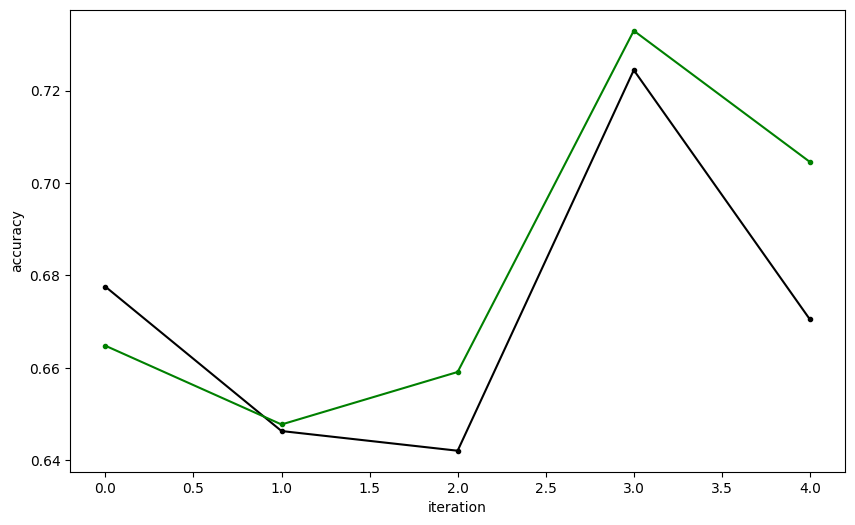

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy_2, color = 'k', marker = '.')
plt.plot(test_accuracy_2, color = 'g', marker = '.')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.savefig('d SGD iteration.png')

In [ ]:
model_2.learning_rate = 'constant'
learning_rates = np.linspace(0.05,0.5,100)
print(learning_rates)

train_accuracy_3 = []
test_accuracy_3 = []

for i in range(len(learning_rates)):
  model_2.eta0 = learning_rates[i]
  model_2.fit(x1_train,y1_train)
  train_accuracy_3.append(model_2.score(x1_train,y1_train))
  test_accuracy_3.append(model_2.score(x1_test,y1_test))
  print('eta0:',learning_rates[i],'\n','score_train=',train_accuracy_3[i]*100,'\n','score_test=',test_accuracy_3[i]*100,'\n')

[0.05       0.05454545 0.05909091 0.06363636 0.06818182 0.07272727
 0.07727273 0.08181818 0.08636364 0.09090909 0.09545455 0.1
 0.10454545 0.10909091 0.11363636 0.11818182 0.12272727 0.12727273
 0.13181818 0.13636364 0.14090909 0.14545455 0.15       0.15454545
 0.15909091 0.16363636 0.16818182 0.17272727 0.17727273 0.18181818
 0.18636364 0.19090909 0.19545455 0.2        0.20454545 0.20909091
 0.21363636 0.21818182 0.22272727 0.22727273 0.23181818 0.23636364
 0.24090909 0.24545455 0.25       0.25454545 0.25909091 0.26363636
 0.26818182 0.27272727 0.27727273 0.28181818 0.28636364 0.29090909
 0.29545455 0.3        0.30454545 0.30909091 0.31363636 0.31818182
 0.32272727 0.32727273 0.33181818 0.33636364 0.34090909 0.34545455
 0.35       0.35454545 0.35909091 0.36363636 0.36818182 0.37272727
 0.37727273 0.38181818 0.38636364 0.39090909 0.39545455 0.4
 0.40454545 0.40909091 0.41363636 0.41818182 0.42272727 0.42727273
 0.43181818 0.43636364 0.44090909 0.44545455 0.45       0.45454545
 0.459090

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

eta0: 0.1590909090909091 
 score_train= 58.09659090909091 
 score_test= 57.95454545454546 

eta0: 0.16363636363636364 
 score_train= 53.97727272727273 
 score_test= 53.40909090909091 

eta0: 0.16818181818181818 
 score_train= 70.5965909090909 
 score_test= 71.5909090909091 

eta0: 0.17272727272727273 
 score_train= 70.5965909090909 
 score_test= 70.45454545454545 

eta0: 0.17727272727272725 
 score_train= 69.60227272727273 
 score_test= 71.02272727272727 

eta0: 0.18181818181818182 
 score_train= 66.9034090909091 
 score_test= 63.63636363636363 

eta0: 0.18636363636363634 
 score_train= 55.11363636363637 
 score_test= 57.95454545454546 

eta0: 0.19090909090909092 
 score_train= 64.63068181818183 
 score_test= 65.9090909090909 

eta0: 0.19545454545454544 
 score_train= 68.32386363636364 
 score_test= 64.77272727272727 

eta0: 0.2 
 score_train= 64.91477272727273 
 score_test= 64.20454545454545 

eta0: 0.20454545454545453 
 score_train= 63.06818181818182 
 score_test= 64.77272727272727 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

score_test= 41.47727272727273 

eta0: 0.2727272727272727 
 score_train= 71.875 
 score_test= 71.5909090909091 

eta0: 0.2772727272727273 
 score_train= 66.05113636363636 
 score_test= 65.9090909090909 

eta0: 0.2818181818181818 
 score_train= 58.52272727272727 
 score_test= 56.81818181818182 

eta0: 0.2863636363636364 
 score_train= 70.5965909090909 
 score_test= 70.45454545454545 

eta0: 0.2909090909090909 
 score_train= 61.64772727272727 
 score_test= 63.63636363636363 

eta0: 0.29545454545454547 
 score_train= 70.45454545454545 
 score_test= 69.31818181818183 

eta0: 0.3 
 score_train= 64.3465909090909 
 score_test= 65.9090909090909 

eta0: 0.3045454545454545 
 score_train= 57.67045454545454 
 score_test= 62.5 

eta0: 0.3090909090909091 
 score_train= 69.46022727272727 
 score_test= 69.88636363636364 

eta0: 0.3136363636363636 
 score_train= 64.77272727272727 
 score_test= 65.3409090909091 

eta0: 0.3181818181818182 
 score_train= 57.38636363636363 
 score_test= 54.54545454545454 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

eta0: 0.3818181818181818 
 score_train= 60.9375 
 score_test= 62.5 

eta0: 0.38636363636363635 
 score_train= 66.76136363636364 
 score_test= 64.77272727272727 

eta0: 0.3909090909090909 
 score_train= 68.4659090909091 
 score_test= 65.3409090909091 

eta0: 0.39545454545454545 
 score_train= 67.75568181818183 
 score_test= 69.88636363636364 

eta0: 0.39999999999999997 
 score_train= 65.76704545454545 
 score_test= 65.3409090909091 

eta0: 0.40454545454545454 
 score_train= 70.73863636363636 
 score_test= 70.45454545454545 

eta0: 0.40909090909090906 
 score_train= 55.96590909090909 
 score_test= 54.54545454545454 

eta0: 0.41363636363636364 
 score_train= 56.96022727272727 
 score_test= 56.81818181818182 

eta0: 0.41818181818181815 
 score_train= 53.40909090909091 
 score_test= 52.27272727272727 

eta0: 0.4227272727272727 
 score_train= 68.4659090909091 
 score_test= 64.77272727272727 

eta0: 0.42727272727272725 
 score_train= 65.9090909090909 
 score_test= 64.20454545454545 

eta0: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

eta0: 0.48636363636363633 
 score_train= 69.60227272727273 
 score_test= 71.5909090909091 

eta0: 0.49090909090909085 
 score_train= 59.80113636363637 
 score_test= 64.77272727272727 

eta0: 0.4954545454545454 
 score_train= 67.1875 
 score_test= 66.47727272727273 

eta0: 0.5 
 score_train= 52.84090909090909 
 score_test= 57.38636363636363 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


maximum accuracy for train data is 73.4375 % for 0.1090909090909091 learning rate
maximum accuracy for test data is 74.43181818181817 % for 0.1090909090909091 learning rate


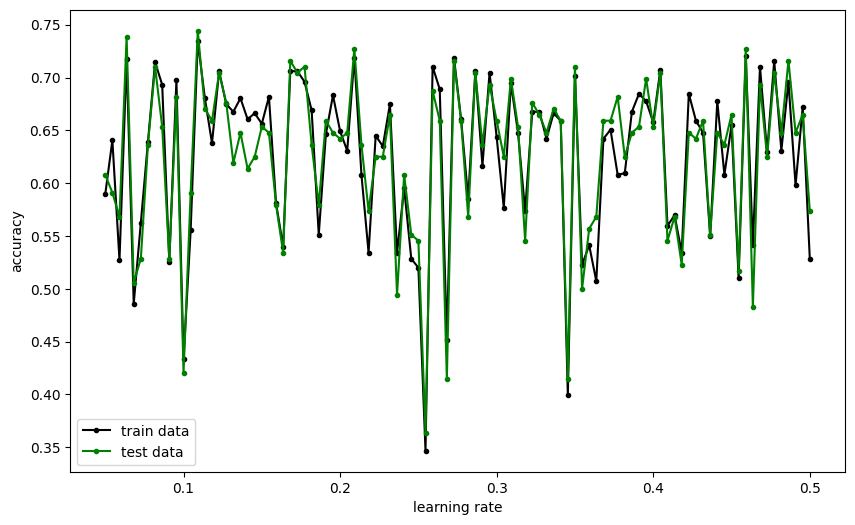

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(learning_rates,train_accuracy_3, color = 'k', marker = '.')
plt.plot(learning_rates,test_accuracy_3, color = 'g', marker = '.')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.savefig('accuracy different eta0.png')
plt.legend(['train data','test data'])
plt.savefig('d SGD_differnt learning rate.png')

max_train_acc_index_3 = np.argmax(train_accuracy_3)
max_train_acc_value_3 = np.max(train_accuracy_3)
print('maximum accuracy for train data is',max_train_acc_value_3*100,'% for',learning_rates[max_train_acc_index_3],'learning rate')
max_test_acc_index_3 = np.argmax(test_accuracy_3)
max_test_acc_value_3 = np.max(test_accuracy_3)
print('maximum accuracy for test data is',max_test_acc_value_3*100,'% for',learning_rates[max_test_acc_index_3],'learning rate')

In [ ]:
model_2.learning_rate = 'optimal'

alphas = np.linspace(0.00001,1,100)

train_accuracy_4 = []
test_accuracy_4 = []

for i in range(len(alphas)):
  model_2.alpha = alphas[i]
  model_2.fit(x1_train,y1_train)
  train_accuracy_4.append(model_2.score(x1_train,y1_train))
  test_accuracy_4.append(model_2.score(x1_test,y1_test))
  print('alpha:',alphas[i],'\n','score_train=',train_accuracy_4[i]*100,'\n','score_test=',test_accuracy_4[i]*100,'\n')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

alpha: 1e-05 
 score_train= 66.76136363636364 
 score_test= 64.77272727272727 

alpha: 0.01011090909090909 
 score_train= 68.18181818181817 
 score_test= 68.18181818181817 

alpha: 0.02021181818181818 
 score_train= 56.81818181818182 
 score_test= 56.81818181818182 

alpha: 0.030312727272727272 
 score_train= 69.74431818181817 
 score_test= 70.45454545454545 

alpha: 0.04041363636363637 
 score_train= 68.32386363636364 
 score_test= 70.45454545454545 

alpha: 0.05051454545454546 
 score_train= 68.03977272727273 
 score_test= 66.47727272727273 

alpha: 0.06061545454545455 
 score_train= 69.31818181818183 
 score_test= 65.3409090909091 

alpha: 0.07071636363636363 
 score_train= 66.76136363636364 
 score_test= 63.63636363636363 

alpha: 0.08081727272727272 
 score_train= 68.75 
 score_test= 67.04545454545455 

alpha: 0.09091818181818181 
 score_train= 57.24431818181818 
 score_test= 60.79545454545454 

alpha: 0.1010190909090909 
 score_train= 68.32386363636364 
 score_test= 69.8863636363

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

alpha: 0.2424318181818182 
 score_train= 66.33522727272727 
 score_test= 61.93181818181818 

alpha: 0.2525327272727273 
 score_train= 70.73863636363636 
 score_test= 70.45454545454545 

alpha: 0.2626336363636364 
 score_train= 67.32954545454545 
 score_test= 66.47727272727273 

alpha: 0.27273454545454545 
 score_train= 73.1534090909091 
 score_test= 68.75 

alpha: 0.28283545454545456 
 score_train= 66.05113636363636 
 score_test= 64.77272727272727 

alpha: 0.29293636363636366 
 score_train= 65.48295454545455 
 score_test= 64.77272727272727 

alpha: 0.3030372727272727 
 score_train= 59.51704545454546 
 score_test= 59.09090909090909 

alpha: 0.3131381818181818 
 score_train= 71.875 
 score_test= 71.02272727272727 

alpha: 0.3232390909090909 
 score_train= 50.28409090909091 
 score_test= 48.86363636363637 

alpha: 0.33334 
 score_train= 70.73863636363636 
 score_test= 71.02272727272727 

alpha: 0.34344090909090913 
 score_train= 73.1534090909091 
 score_test= 74.43181818181817 

alpha: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

alpha: 0.4848536363636364 
 score_train= 58.38068181818182 
 score_test= 63.06818181818182 

alpha: 0.4949545454545455 
 score_train= 68.03977272727273 
 score_test= 68.75 

alpha: 0.5050554545454545 
 score_train= 65.76704545454545 
 score_test= 65.3409090909091 

alpha: 0.5151563636363636 
 score_train= 58.52272727272727 
 score_test= 63.63636363636363 

alpha: 0.5252572727272727 
 score_train= 64.63068181818183 
 score_test= 65.9090909090909 

alpha: 0.5353581818181817 
 score_train= 64.3465909090909 
 score_test= 61.93181818181818 

alpha: 0.5454590909090908 
 score_train= 61.93181818181818 
 score_test= 64.77272727272727 

alpha: 0.5555599999999999 
 score_train= 67.89772727272727 
 score_test= 63.06818181818182 

alpha: 0.565660909090909 
 score_train= 64.77272727272727 
 score_test= 60.79545454545454 

alpha: 0.5757618181818182 
 score_train= 69.60227272727273 
 score_test= 69.88636363636364 

alpha: 0.5858627272727273 
 score_train= 72.1590909090909 
 score_test= 74.43181818181

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

alpha: 0.7272754545454545 
 score_train= 59.94318181818182 
 score_test= 55.68181818181818 

alpha: 0.7373763636363636 
 score_train= 70.0284090909091 
 score_test= 72.72727272727273 

alpha: 0.7474772727272727 
 score_train= 60.36931818181818 
 score_test= 61.36363636363637 

alpha: 0.7575781818181818 
 score_train= 55.96590909090909 
 score_test= 60.22727272727273 

alpha: 0.7676790909090908 
 score_train= 77.13068181818183 
 score_test= 74.43181818181817 

alpha: 0.7777799999999999 
 score_train= 56.81818181818182 
 score_test= 56.25 

alpha: 0.787880909090909 
 score_train= 65.625 
 score_test= 61.36363636363637 

alpha: 0.7979818181818181 
 score_train= 72.86931818181817 
 score_test= 69.31818181818183 

alpha: 0.8080827272727272 
 score_train= 67.75568181818183 
 score_test= 63.63636363636363 

alpha: 0.8181836363636363 
 score_train= 67.4715909090909 
 score_test= 63.63636363636363 

alpha: 0.8282845454545454 
 score_train= 69.17613636363636 
 score_test= 72.1590909090909 

alph

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


maximum accuracy for train data is 77.13068181818183 % for 0.7676790909090908 alpha quantity
maximum accuracy for test data is 74.43181818181817 % for 0.34344090909090913 alpha quantity


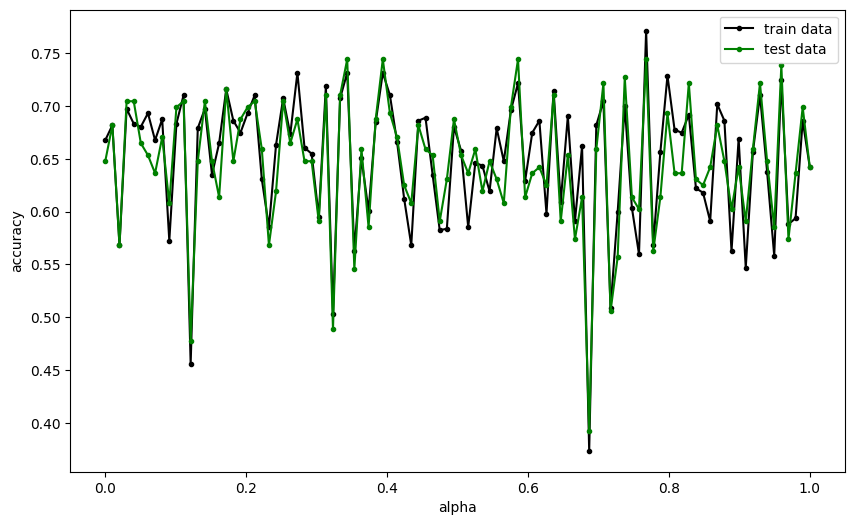

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(alphas,train_accuracy_4, color = 'k', marker = '.')
plt.plot(alphas,test_accuracy_4, color = 'g', marker = '.')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.savefig('accuracy differnt alpha.png')
plt.legend(['train data','test data'])
plt.savefig('dSGD_differnt alpha.png')

max_train_acc_index_4 = np.argmax(train_accuracy_4)
max_train_acc_value_4 = np.max(train_accuracy_4)
print('maximum accuracy for train data is',max_train_acc_value_4*100,'% for',alphas[max_train_acc_index_4],'alpha quantity')
max_test_acc_index_4 = np.argmax(test_accuracy_4)
max_test_acc_value_4 = np.max(test_accuracy_4)
print('maximum accuracy for test data is',max_test_acc_value_4*100,'% for',alphas[max_test_acc_index_4],'alpha quantity')

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
def plot_region(x,y,model,name='Train data'):

    def miss_class():

        hat = model.predict(x)
        miss = np.where(y != hat)
        miss = x[miss]
        return miss

    scatter_highlight_kwargs = {'s': 60, 'label': 'Missclassified', 'alpha': 0.7, 'linewidth':2}
    ax = plot_decision_regions(x,y,clf=model,zoom_factor = 1.,legend = 0,X_highlight = miss_class(),scatter_highlight_kwargs =  scatter_highlight_kwargs)
    ax.legend(loc='upper right')
    ax.set_title(f'Decision region for {name}')
    ax.set_xlabel('Latent feature 1')
    ax.set_ylabel('Latent feature 2')

In [ ]:
t1 = TSNE(n_components = 2,random_state = 44)


In [ ]:
X1_embedded = t1.fit_transform(X1,yn)

In [ ]:
x_tr, x_te, y_tr, y_te = train_test_split( X1_embedded, yn, test_size = 0.2)

# scaling
scaler = StandardScaler().fit(x_tr)
x_train_r_s  = scaler.transform(x_tr)
x_val_r_s  = scaler.transform(x_te)

In [ ]:
y_tr

array([1., 3., 3., 0., 3., 3., 1., 3., 2., 1., 2., 3., 3., 2., 1., 2., 1.,
       1., 2., 2., 3., 1., 1., 1., 2., 3., 2., 0., 3., 3., 3., 1., 0., 2.,
       1., 1., 2., 1., 3., 1., 1., 3., 0., 2., 2., 1., 3., 1., 0., 1., 0.,
       1., 2., 2., 3., 1., 3., 3., 0., 1., 2., 1., 2., 3., 2., 0., 1., 3.,
       0., 2., 2., 0., 0., 1., 2., 1., 2., 1., 0., 0., 1., 1., 3., 1., 0.,
       1., 2., 2., 0., 0., 0., 0., 2., 0., 2., 0., 3., 0., 3., 1., 0., 1.,
       0., 2., 1., 0., 1., 1., 2., 0., 0., 2., 1., 3., 0., 2., 0., 1., 3.,
       1., 2., 0., 3., 0., 0., 1., 3., 3., 0., 2., 1., 0., 1., 3., 0., 3.,
       2., 2., 1., 3., 0., 3., 2., 2., 2., 3., 3., 0., 2., 2., 0., 1., 3.,
       3., 3., 1., 0., 0., 1., 2., 1., 0., 1., 0., 2., 3., 3., 3., 0., 2.,
       2., 0., 3., 1., 3., 2., 1., 2., 2., 1., 3., 3., 3., 0., 2., 3., 0.,
       0., 0., 0., 3., 1., 0., 1., 2., 2., 2., 2., 3., 2., 0., 3., 2., 1.,
       1., 0., 2., 3., 0., 1., 1., 2., 2., 0., 2., 2., 2., 3., 1., 0., 2.,
       0., 2., 3., 0., 1.

In [ ]:
model_1= LogisticRegression(solver = 'sag',max_iter = 8,random_state = 44)

model_2 = SGDClassifier(max_iter =3,learning_rate = 'constant',eta0 = 0.109,alpha = 0.767679,random_state = 44)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/

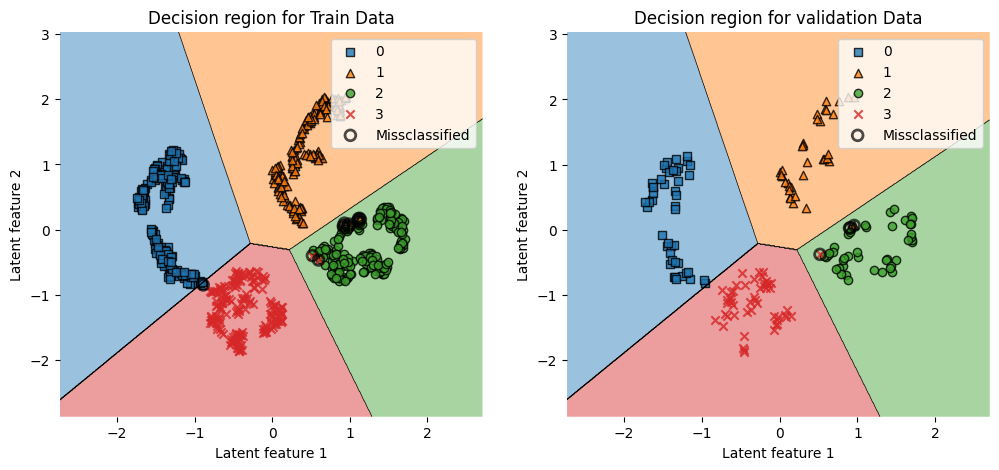

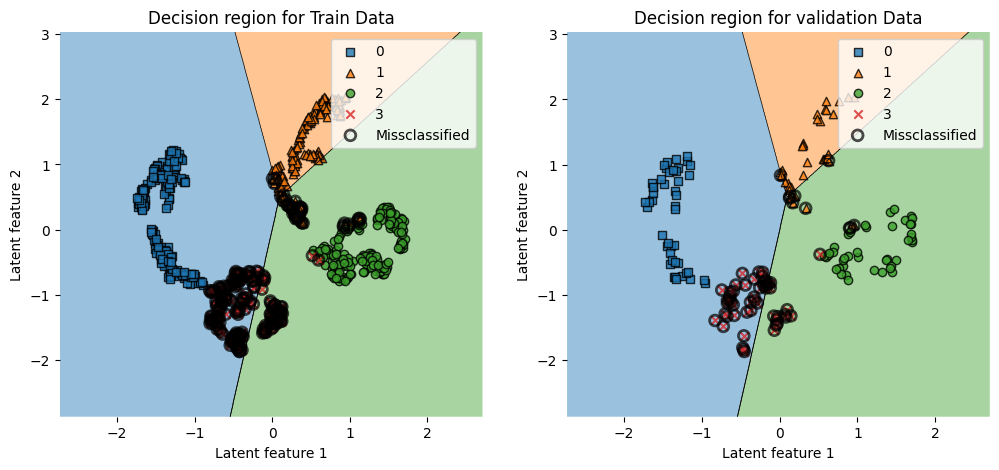

In [ ]:
models = [model_1,model_2]
model_names_drawed = ['model_1', 'model_2']
for i, m in enumerate(models):
    m.fit(x_train_r_s,y_tr.astype(int))
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plot_region(x_train_r_s,y_tr.astype(int),m,'Train Data')
    plt.subplot(1,2,2)
    plot_region(x_val_r_s,y_te.astype(int),m,'validation Data')
    image_name = model_names_drawed[i]+'.png'
    plt.savefig(image_name)